In [1]:
import pandas as pd
import numpy as np
from commons import *

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
CSV_TRAIN       = './train.csv'
DATA_DIR        = '../inputs/512/train/'
RESIZE          = 512
IGNORE_CLASSES  = [14]

In [3]:
df_train = pd.read_csv(CSV_TRAIN)

In [4]:
df_train.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2080,2336
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0,2304,2880
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072


FROM ONE CSV

In [8]:
dataset = YoloDataset(df_train.copy())
dataset.df.head(5)

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN,2332,2580,NaN,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN,2954,3159,NaN,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,0.332212,0.588613,0.794712,0.783818,2080,2336,0.563462,0.686216,0.462500,0.195205,0.090283
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,0.548611,0.257986,0.699219,0.353819,2304,2880,0.623915,0.305903,0.150608,0.095833,0.014433
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN,2540,3072,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset.df.describe()

,class_id,x_min,y_min,x_max,y_max,width,height,x_mid,y_mid,w,h,area
count,67914.000000,36096.000000,36096.000000,36096.000000,36096.000000,67914.000000,67914.000000,36096.000000,36096.000000,36096.000000,36096.000000,36096.000000
mean,9.979312,0.415771,0.373185,0.592515,0.510108,2474.954280,2816.755205,0.504143,0.441647,0.176744,0.136923,0.030441
std,5.036494,0.214772,0.191354,0.224402,0.199746,360.818872,297.959417,0.209151,0.187271,0.134128,0.112906,0.039812
min,0.000000,0.000000,0.000000,0.028653,0.034288,823.000000,927.000000,0.015625,0.022304,0.003906,0.000989,0.000023
25%,7.000000,0.239149,0.221998,0.402344,0.358040,2256.000000,2500.000000,0.311686,0.298503,0.084050,0.066319,0.005484
50%,13.000000,0.398438,0.323979,0.636763,0.490936,2425.000000,2880.000000,0.558858,0.410590,0.128514,0.112892,0.014883
75%,14.000000,0.564480,0.523611,0.786654,0.675130,2718.000000,3072.000000,0.637238,0.590327,0.232969,0.160764,0.044523
max,14.000000,0.969238,0.963619,1.000000,1.000000,3320.000000,3408.000000,0.983398,0.980566,0.957212,0.980375,0.938427


In [10]:
dataset.write_one_annotation(
                image_id='04bb8bd7ee6f88a16623fe5c6dd4da91',
                save_dir='.cache'
            )

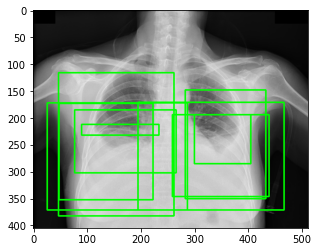

In [11]:
annation_path = '.cache/04bb8bd7ee6f88a16623fe5c6dd4da91.txt'
image_path = ''
bboxes = []
with open(annation_path, 'r') as f:
    for line in f.readlines():
        annotation = list(map(float, line.split()))
        c, xywh = annotation[0], annotation[1:]
        xyxy = ratio2abs(xywh2xyxy(xywh),'04bb8bd7ee6f88a16623fe5c6dd4da91',df_train.copy(),512)
        annotation[1:] = xyxy
        bboxes += [annotation]
plt_bboxes(os.path.join(DATA_DIR, "04bb8bd7ee6f88a16623fe5c6dd4da91.png"), bboxes)

In [ ]:
dataset.write_all_annotations(
                save_dir='./annotations/',
            )

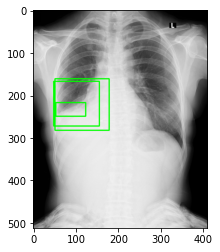

In [6]:
bboxes = get_bboxes_xyxy_resized(
    size=512, img_id="0dc7b1615100b4f5d3ae294bae0d5d43", database=df_train
)
plt_bboxes(os.path.join(DATA_DIR, "0dc7b1615100b4f5d3ae294bae0d5d43.png"), bboxes)

FROM SPLITED CSV

In [9]:
FOLDS_DIR       = '.cache/'
FOLDS           = [0, 1, 2, 3, 4]
TRAIN_FOLDS_DIR = os.path.join(FOLDS_DIR, 'train/')
VAL_FOLDS_DIR   = os.path.join(FOLDS_DIR, 'val/')
EXT             = '.csv'


In [12]:
for fold in FOLDS:
    train_path  = f'{TRAIN_FOLDS_DIR}{fold}{EXT}'
    val_path    = f'{VAL_FOLDS_DIR}{fold}{EXT}'
    train_df    = pd.read_csv(train_path)
    val_df      = pd.read_csv(val_path)

    dataset = YoloDataset(train_df.copy())
    dataset.write_all_annotations(
            save_dir=f'./yolo/{fold}/train',
        )
    
    dataset = YoloDataset(val_df.copy())
    dataset.write_all_annotations(
            save_dir=f'./yolo/{fold}/val',
        )

<class 'str'>
